In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set()

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score,roc_curve,accuracy_score,make_scorer,auc
import tensorflow as tf

2023-02-04 14:04:00.583741: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 14:04:00.583778: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-04 14:04:01.708298: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-04 14:04:01.708411: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-04 14:04:01.708423: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
def fit_classifier(model, X, y, parameters=None, scorer_metrics=None):

    grid_obj = GridSearchCV(estimator=model, param_grid=parameters,
                            scoring=make_scorer(scorer_metrics), cv=5)

    grid_fit = grid_obj.fit(X, y)

    model_estimator = grid_fit.best_estimator_

    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)

    print("\n")
    print("\nModel performance on training set\n------------------------")
    print("Final accuracy score on the training data: {:.4f}".format(
        accuracy_score(y, y_pred)))
    print("Final precision score on training data: {:.4f}".format(
        precision_score(y, y_pred)))
    print("Final Recall score on training data: {:.4f}".format(
        recall_score(y, y_pred)))
    print("Final ROC AUC score on training data: {:.4f}".format(
        roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator

In [3]:
# создаём функцию для построения графика ROC-AUC 
def roc_auc_plot(model, X, y, label=None):

    y_score = model.predict_proba(X)[:, 1]

    roc = roc_curve(y, y_score)

    plt.plot(roc[0], roc[1], label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    roc_score = auc(roc[0], roc[1])
    print('AUC score of %s is %.4f.' % (label, roc_score))

In [4]:
def plot_roc_curve(y, pred):
    roc_score = roc_auc_score(y, pred)

    fpr, tpr, threshold = roc_curve(y, pred)

    plt.figure(figsize=(6, 5))
    lw = 2
    plt.title('ROC-AUC Curve, %2.1f%%' % (100*roc_score), fontsize=14)
    plt.plot(fpr, tpr, color='darkorange', lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.savefig("roc_auc_final.png")
    plt.show()

In [5]:
df_2018 = pd.read_csv('./samples/y2018.csv')
df_2019 = pd.read_csv('./samples/y2019.csv')
df_2020 = pd.read_csv('./samples/y2020.csv')
df_2021 = pd.read_csv('./samples/y2021.csv')
df_2022 = pd.read_csv('./samples/y2022.csv')

In [6]:
df_2018.head()

,system:index,m_10,m_11,m_4,m_5,m_6,m_7,m_8,m_9,name,state,year,.geo
0,2_0_0,0.771702,0.256970,0.589903,0.798264,0.826473,0.489460,0.842676,0.785188,161_2019,1,y2018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,2_1_0,0.555886,0.095696,0.228813,0.646295,0.833649,0.734022,0.794393,0.665546,43E_2019,1,y2018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,2_2_0,0.184525,0.018129,0.263804,0.809224,0.830125,0.644455,0.776864,0.785586,313_2020,0,y2018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,2_3_0,0.594700,0.369903,0.387250,0.841079,0.897446,0.865163,0.878579,0.802358,134_2019,1,y2018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,2_4_0,0.612999,0.181587,0.400805,0.825996,0.845218,0.597657,0.876725,0.100219,77E_2019,1,y2018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [7]:
def prepare_df(data):
    df = data.copy()
    del df['system:index']
    del df['name']
    del df['year']
    del df['.geo']
    return df

In [8]:
frames = [df_2018, df_2019, df_2020,df_2021,df_2022]
result_df = pd.concat(frames)

In [9]:
result_df.name.value_counts()

50e_sh_2022    135
33k_sh_2022    118
26k_sh_2022    116
25e_sh_2022     83
4e_sh_2022      81
              ... 
173_2020         1
276_2020         1
367_2020         1
54k_2019         1
10e_sh_2022      1
Name: name, Length: 787, dtype: int64

In [10]:
result_df.describe()

,m_10,m_11,m_4,m_5,m_6,m_7,m_8,m_9,state
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,-0.993550,-4.289760,0.288312,0.577447,0.716622,0.412513,0.649406,0.567419,0.7302
std,11.971050,20.875641,0.129722,0.253050,0.214007,4.501124,0.186255,0.278829,0.4439
min,-100.000000,-100.000000,0.027547,0.014791,0.062605,-100.000000,0.109643,0.012163,0.0000
25%,0.213617,0.023413,0.224581,0.404069,0.639998,0.447294,0.512794,0.503917,0.0000
50%,0.534104,0.228649,0.291175,0.670420,0.813716,0.687461,0.701702,0.678640,1.0000
75%,0.635525,0.426083,0.377113,0.776165,0.861820,0.794964,0.801592,0.768782,1.0000
max,0.897895,0.784954,0.746556,0.922326,0.918665,0.936101,0.915713,0.888346,1.0000


In [11]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  5000 non-null   object 
 1   m_10          5000 non-null   float64
 2   m_11          5000 non-null   float64
 3   m_4           5000 non-null   float64
 4   m_5           5000 non-null   float64
 5   m_6           5000 non-null   float64
 6   m_7           5000 non-null   float64
 7   m_8           5000 non-null   float64
 8   m_9           5000 non-null   float64
 9   name          5000 non-null   object 
 10  state         5000 non-null   int64  
 11  year          5000 non-null   object 
 12  .geo          5000 non-null   object 
dtypes: float64(8), int64(1), object(4)
memory usage: 546.9+ KB


In [12]:
result_df = result_df[result_df.m_10 != -100.0]
result_df = result_df[result_df.m_11 != -100.0]
result_df = result_df[result_df.m_7 != -100.0]

In [13]:
corr = result_df.corr()
c = corr.abs().unstack()
c[c == 1] = 0
c = c.sort_values(ascending=False).drop_duplicates()
tmp = c.head(10)
tmp.sort_values(ascending=True)
tmp

m_10  m_9    0.824781
m_5   m_9    0.808532
m_10  m_5    0.804918
m_6   m_9    0.803546
m_4   m_9    0.792689
m_5   m_6    0.777688
      m_4    0.774859
m_9   m_7    0.767234
m_6   m_7    0.724965
m_9   m_8    0.718982
dtype: float64

In [14]:
# проверка на баланс классов - классы не сбалансированы
result_df["state"].value_counts()

1    3386
0    1307
Name: state, dtype: int64

In [15]:
used = result_df[result_df["state"] == 0]
unused = result_df[result_df["state"] ==  1]
print(unused.shape)
print(used.shape)

(3386, 13)
(1307, 13)


In [16]:
from sklearn.utils import resample
unused_downsample = resample(unused,
             replace=True,
             n_samples=len(used),
             random_state=42)

print(unused_downsample.shape)

(1307, 13)


In [17]:
data_downsampled = pd.concat([unused_downsample, used])

In [18]:
print(data_downsampled["state"].value_counts())

1    1307
0    1307
Name: state, dtype: int64


In [19]:
# Сгруппируем данные по столбцу "name"
grouped = data_downsampled.groupby('name')

# Разделим имена на 80% для обучения, 10% для проверки и 10% для тестирования
np.random.seed(0)
names = list(grouped.groups.keys())
train_names = np.random.choice(names, int(0.8*len(names)), replace=False)
remaining_names = np.setdiff1d(names, train_names)
val_names = np.random.choice(remaining_names, int(0.5*len(remaining_names)), replace=False)
test_names = np.setdiff1d(remaining_names, val_names)

# Разделим данные на три набора на основе имен
train_df = pd.concat([grouped.get_group(name) for name in train_names]).reset_index(drop=True)
val_df = pd.concat([grouped.get_group(name) for name in val_names]).reset_index(drop=True)
test_df = pd.concat([grouped.get_group(name) for name in test_names]).reset_index(drop=True)

# Разделим годы в каждой группе имен на три группы
for name, group in grouped:
    if name in train_names:
        set_df = train_df[train_df['name'] == name]
    elif name in val_names:
        set_df = val_df[val_df['name'] == name]
    else:
        set_df = test_df[test_df['name'] == name]
    
    years = list(group['year'].unique())
    np.random.seed(0)
    train_years = np.random.choice(years, int(0.8*len(years)), replace=False)
    remaining_years = np.setdiff1d(years, train_years)
    val_years = np.random.choice(remaining_years, int(0.5*len(remaining_years)), replace=False)
    test_years = np.setdiff1d(remaining_years, val_years)
    
    set_df.loc[set_df['year'].isin(train_years), 'split'] = 'train'
    set_df.loc[set_df['year'].isin(val_years), 'split'] = 'val'
    set_df.loc[set_df['year'].isin(test_years), 'split'] = 'test'

In [20]:
print(len(train_df))
print(len(val_df))
print(len(test_df))

1961
330
323


In [21]:
train_df=prepare_df(train_df)
val_df=prepare_df(val_df)
test_df=prepare_df(test_df)

In [22]:
# разделяем искомую переменную от всех данных
X_train = train_df.drop(columns=['state'])
y_train = train_df['state']
X_test = test_df.drop(columns=['state'])
y_test = test_df['state']
X_val = val_df.drop(columns=['state'])
y_val = val_df['state']

In [23]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1961, 8)
(323, 8)
(330, 8)


In [24]:
X_val.head()

,m_10,m_11,m_4,m_5,m_6,m_7,m_8,m_9
0,0.669041,0.158649,0.289833,0.619844,0.661807,0.486317,0.721060,0.707134
1,0.671044,0.208358,0.344216,0.586012,0.565657,0.458737,0.696694,0.678773
2,0.671044,0.208358,0.344216,0.586012,0.565657,0.458737,0.696694,0.678773
3,0.564226,0.324536,0.445970,0.785858,0.890573,0.752947,0.442255,0.734556
4,0.244644,0.130102,0.243329,0.207050,0.544581,0.863509,0.804263,0.843711


In [25]:
# найдем и построим наилучшую модельмодель для DecisionTree
parameters_DT = {'max_depth': [3, 5, 7],
                 'min_samples_leaf': [2, 3, 4],
                 'min_samples_split': [2, 3, 4]}

model_DT = fit_classifier(DecisionTreeClassifier(random_state=44), X_train, y_train,
                          parameters=parameters_DT, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7991
Final precision score on training data: 0.8236
Final Recall score on training data: 0.7671
Final ROC AUC score on training data: 0.7995


The best parameters are: DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=44)


In [26]:
# найдем и построим наилучшую модель для random forest
# Create the parameters list
parameters_RF = {'n_estimators':[10,50],'max_depth': [2, 5, 7,10], 'min_samples_leaf': [
    2, 3, 5, 7, 10], 'min_samples_split': [2, 3, 5]}

model_RF = fit_classifier(RandomForestClassifier(random_state=18), X_train, y_train,
                          parameters=parameters_RF, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7568
Final precision score on training data: 0.7137
Final Recall score on training data: 0.8669
Final ROC AUC score on training data: 0.7554


The best parameters are: RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=10,
                       random_state=18)


AUC score of Random Forest is 0.7698.
AUC score of Decision Tree is 0.8131.


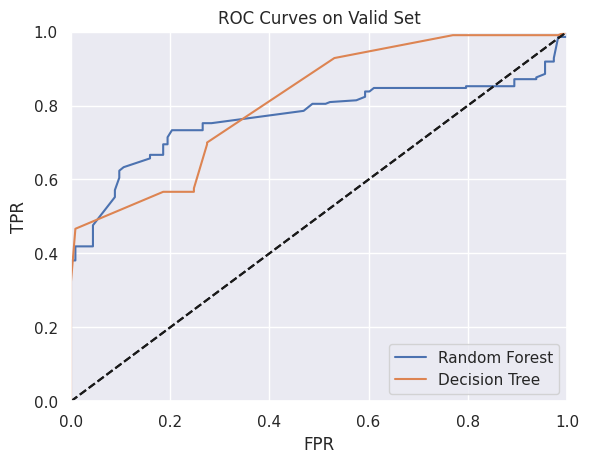

In [27]:
roc_auc_plot(model_RF, X_test, y_test, label='Random Forest')
roc_auc_plot(model_DT, X_test, y_test, label='Decision Tree')
plt.title('ROC Curves on Valid Set')
plt.legend(loc='lower right')
plt.savefig("roc_valid.png")
plt.show()

In [28]:
def show_confusion_matrix(X, y, model, threshold=0.5):
    pred = model.predict_proba(X)[:, 1]
    pred = [1 if p >= threshold else 0 for p in pred]
    cm = pd.DataFrame(confusion_matrix(y, pred),
                      index=["actual 0", "actual 1"], columns=["pred 0", "pred 1"])
    print("Threshold = %.2f" % threshold)
    print("Accuracy score: %.1f%%" % (100 * accuracy_score(y, pred)))
    print("Confusion matrix:")
    display(cm)

In [29]:
show_confusion_matrix(X_test, y_test, model_DT, threshold=.6)

Threshold = 0.60
Accuracy score: 65.3%
Confusion matrix:


,pred 0,pred 1
actual 0,92,21
actual 1,91,119


In [30]:
show_confusion_matrix(X_test, y_test, model_RF, threshold=.6)

Threshold = 0.60
Accuracy score: 61.6%
Confusion matrix:


,pred 0,pred 1
actual 0,112,1
actual 1,123,87


In [31]:
pred = model_DT.predict(X_val)
print("Accuracy score: %.1f%%" % (100 * accuracy_score(y_val, pred)))

Accuracy score: 76.1%


In [32]:
pred = model_RF.predict(X_val)
print("Accuracy score: %.1f%%" % (100 * accuracy_score(y_val, pred)))

Accuracy score: 80.9%


In [33]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_val=tf.keras.utils.to_categorical(y_val)

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

2023-02-04 14:05:07.356652: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-04 14:05:07.356691: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-04 14:05:07.356734: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vladimir-ProBook): /proc/driver/nvidia/version does not exist


In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
print(X_train.shape)
print(X_test.shape)

(1961, 8)
(323, 8)


In [37]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
62/62 [==============================] - 1s 7ms/step - loss: 0.7036 - accuracy: 0.5110 - val_loss: 0.6728 - val_accuracy: 0.6502
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4957 - val_loss: 0.6755 - val_accuracy: 0.6502
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5171 - val_loss: 0.6639 - val_accuracy: 0.6502
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5365 - val_loss: 0.6679 - val_accuracy: 0.7214
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5604 - val_loss: 0.6600 - val_accuracy: 0.6563
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5507 - val_loss: 0.6609 - val_accuracy: 0.7368
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6710 - accuracy: 0.6191 - val_loss: 0.6439 - val_accuracy: 0.7307
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4628 - accuracy: 0.7838 - val_loss: 0.5551 - val_accuracy: 0.6533
Epoch 60/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7838 - val_loss: 0.5635 - val_accuracy: 0.6687
Epoch 61/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4702 - accuracy: 0.7914 - val_loss: 0.5442 - val_accuracy: 0.6533
Epoch 62/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7838 - val_loss: 0.5378 - val_accuracy: 0.6935
Epoch 63/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7761 - val_loss: 0.5410 - val_accuracy: 0.6811
Epoch 64/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7848 - val_loss: 0.5089 - val_accuracy: 0.7028
Epoch 65/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7884 - val_loss: 0.5193 - val_accuracy: 0.7214
Epoch 

In [38]:
#y_valid = tf.keras.utils.to_categorical(y_val)
test_loss, test_acc = model.evaluate(X_val, y_val)
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

11/11 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7364
Test Accuracy: 73.64%


In [39]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(32, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(16, activation='softmax'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [40]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
62/62 [==============================] - 1s 6ms/step - loss: 0.6944 - accuracy: 0.5166 - val_loss: 0.6865 - val_accuracy: 0.6502
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4941 - val_loss: 0.6838 - val_accuracy: 0.6502
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5120 - val_loss: 0.6820 - val_accuracy: 0.6502
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5385 - val_loss: 0.6806 - val_accuracy: 0.6099
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5472 - val_loss: 0.6787 - val_accuracy: 0.5975
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5426 - val_loss: 0.6850 - val_accuracy: 0.5975
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5783 - val_loss: 0.6756 - val_accuracy: 0.5882
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5438 - accuracy: 0.7517 - val_loss: 0.5782 - val_accuracy: 0.7059
Epoch 60/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.7629 - val_loss: 0.5621 - val_accuracy: 0.6935
Epoch 61/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.7624 - val_loss: 0.5727 - val_accuracy: 0.6997
Epoch 62/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.7440 - val_loss: 0.5848 - val_accuracy: 0.6811
Epoch 63/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5450 - accuracy: 0.7481 - val_loss: 0.5557 - val_accuracy: 0.6935
Epoch 64/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.7552 - val_loss: 0.5713 - val_accuracy: 0.6935
Epoch 65/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5405 - accuracy: 0.7598 - val_loss: 0.5837 - val_accuracy: 0.6966
Epoch 

In [42]:
#y_valid = tf.keras.utils.to_categorical(y_val)
test_loss, test_acc = model1.evaluate(X_val, y_val)
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

11/11 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7606
Test Accuracy: 76.06%


In [43]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(8, activation='softmax'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [44]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
62/62 [==============================] - 1s 6ms/step - loss: 0.7058 - accuracy: 0.5043 - val_loss: 0.7031 - val_accuracy: 0.3498
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5171 - val_loss: 0.6835 - val_accuracy: 0.5882
Epoch 3/100
62/62 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.5125 - val_loss: 0.6808 - val_accuracy: 0.5882
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5263 - val_loss: 0.6768 - val_accuracy: 0.5975
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5385 - val_loss: 0.6779 - val_accuracy: 0.5882
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5487 - val_loss: 0.6759 - val_accuracy: 0.5882
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6815 - accuracy: 0.5665 - val_loss: 0.6706 - val_accuracy: 0.5975
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7542 - val_loss: 0.5720 - val_accuracy: 0.6904
Epoch 60/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7772 - val_loss: 0.5356 - val_accuracy: 0.7183
Epoch 61/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.7721 - val_loss: 0.5644 - val_accuracy: 0.7090
Epoch 62/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.7527 - val_loss: 0.5724 - val_accuracy: 0.6904
Epoch 63/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7629 - val_loss: 0.5475 - val_accuracy: 0.7121
Epoch 64/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.7680 - val_loss: 0.5768 - val_accuracy: 0.6749
Epoch 65/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.7547 - val_loss: 0.5163 - val_accuracy: 0.7337
Epoch 

In [46]:
#y_valid = tf.keras.utils.to_categorical(y_val)
test_loss, test_acc = model2.evaluate(X_val, y_val)
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

11/11 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7909
Test Accuracy: 79.09%


In [47]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(32, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(8, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(4, activation='softmax'))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [48]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
62/62 [==============================] - 2s 7ms/step - loss: 0.7196 - accuracy: 0.5110 - val_loss: 0.6707 - val_accuracy: 0.6502
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.5140 - val_loss: 0.6779 - val_accuracy: 0.6502
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.4931 - val_loss: 0.6845 - val_accuracy: 0.6502
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7081 - accuracy: 0.5069 - val_loss: 0.6863 - val_accuracy: 0.5789
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.4895 - val_loss: 0.6880 - val_accuracy: 0.5913
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7029 - accuracy: 0.4926 - val_loss: 0.6887 - val_accuracy: 0.5882
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7009 - accuracy: 0.5150 - val_loss: 0.6917 - val_accuracy: 0.5913
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6198 - accuracy: 0.6410 - val_loss: 0.6052 - val_accuracy: 0.6687
Epoch 60/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6047 - accuracy: 0.6497 - val_loss: 0.6001 - val_accuracy: 0.6811
Epoch 61/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6492 - val_loss: 0.6014 - val_accuracy: 0.6749
Epoch 62/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6089 - accuracy: 0.6634 - val_loss: 0.6007 - val_accuracy: 0.6749
Epoch 63/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6033 - accuracy: 0.6563 - val_loss: 0.6034 - val_accuracy: 0.6718
Epoch 64/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6010 - accuracy: 0.6486 - val_loss: 0.5950 - val_accuracy: 0.6935
Epoch 65/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6134 - accuracy: 0.6492 - val_loss: 0.5866 - val_accuracy: 0.6873
Epoch 

In [50]:
#y_valid = tf.keras.utils.to_categorical(y_val)
test_loss, test_acc = model3.evaluate(X_val, y_val)
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

11/11 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.8121
Test Accuracy: 81.21%


In [51]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)))
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(tf.keras.layers.Dense(32, activation='relu'))
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(tf.keras.layers.Dense(16, activation='relu'))
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(tf.keras.layers.Dense(8, activation='relu'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(4, activation='softmax'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [52]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
history = model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
62/62 [==============================] - 2s 7ms/step - loss: 0.6957 - accuracy: 0.5186 - val_loss: 0.6858 - val_accuracy: 0.6502
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5069 - val_loss: 0.6848 - val_accuracy: 0.6471
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5385 - val_loss: 0.6817 - val_accuracy: 0.6037
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.5196 - val_loss: 0.6816 - val_accuracy: 0.6099
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5375 - val_loss: 0.6816 - val_accuracy: 0.5913
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5732 - val_loss: 0.6761 - val_accuracy: 0.6161
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.5813 - val_loss: 0.6725 - val_accuracy: 0.7183
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5340 - accuracy: 0.7695 - val_loss: 0.5645 - val_accuracy: 0.7399
Epoch 60/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5341 - accuracy: 0.7583 - val_loss: 0.5780 - val_accuracy: 0.7307
Epoch 61/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5504 - accuracy: 0.7496 - val_loss: 0.5798 - val_accuracy: 0.7121
Epoch 62/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5419 - accuracy: 0.7568 - val_loss: 0.5744 - val_accuracy: 0.7245
Epoch 63/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.7624 - val_loss: 0.5772 - val_accuracy: 0.7245
Epoch 64/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5415 - accuracy: 0.7583 - val_loss: 0.5421 - val_accuracy: 0.7523
Epoch 65/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.7629 - val_loss: 0.5845 - val_accuracy: 0.7059
Epoch 

In [54]:
#y_valid = tf.keras.utils.to_categorical(y_val)
test_loss, test_acc = model4.evaluate(X_val, y_val)
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

11/11 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.7576
Test Accuracy: 75.76%


In [55]:
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)))
model5.add(tf.keras.layers.Dense(32, activation='relu'))
model5.add(tf.keras.layers.Dense(16, activation='relu'))
model5.add(tf.keras.layers.Dropout(0.5))
model5.add(tf.keras.layers.Dense(8, activation='relu'))
model5.add(tf.keras.layers.Dense(4, activation='softmax'))
model5.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [56]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
history = model5.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
62/62 [==============================] - 2s 7ms/step - loss: 0.7264 - accuracy: 0.5059 - val_loss: 0.6556 - val_accuracy: 0.6502
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5059 - val_loss: 0.6766 - val_accuracy: 0.6502
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5059 - val_loss: 0.6849 - val_accuracy: 0.6502
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5059 - val_loss: 0.6742 - val_accuracy: 0.6502
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.5711 - val_loss: 0.6735 - val_accuracy: 0.6223
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.6660 - val_loss: 0.6446 - val_accuracy: 0.6749
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6448 - accuracy: 0.7053 - val_loss: 0.6253 - val_accuracy: 0.7183
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.8378 - val_loss: 0.6056 - val_accuracy: 0.7152
Epoch 60/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8348 - val_loss: 0.5652 - val_accuracy: 0.7430
Epoch 61/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.8353 - val_loss: 0.6732 - val_accuracy: 0.6811
Epoch 62/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8440 - val_loss: 0.5888 - val_accuracy: 0.7152
Epoch 63/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3950 - accuracy: 0.8404 - val_loss: 0.5613 - val_accuracy: 0.7430
Epoch 64/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8389 - val_loss: 0.5708 - val_accuracy: 0.7276
Epoch 65/100
62/62 [==============================] - 0s 4ms/step - loss: 0.3810 - accuracy: 0.8496 - val_loss: 0.5810 - val_accuracy: 0.7307
Epoch 

In [58]:
#y_valid = tf.keras.utils.to_categorical(y_val)
test_loss, test_acc = model5.evaluate(X_val, y_val)
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

11/11 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7576
Test Accuracy: 75.76%


In [59]:
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)))
model6.add(tf.keras.layers.Dense(32, activation='relu'))
model6.add(tf.keras.layers.Dropout(0.5))
model6.add(tf.keras.layers.Dense(16, activation='relu'))
model6.add(tf.keras.layers.Dense(8, activation='relu'))
model6.add(tf.keras.layers.Dense(4, activation='softmax'))
model6.add(tf.keras.layers.Dropout(0.5))
model6.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [60]:
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history = model6.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
62/62 [==============================] - 2s 7ms/step - loss: 0.7239 - accuracy: 0.5258 - val_loss: 0.7084 - val_accuracy: 0.3498
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7144 - accuracy: 0.5043 - val_loss: 0.6957 - val_accuracy: 0.5573
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5288 - val_loss: 0.6802 - val_accuracy: 0.6099
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5365 - val_loss: 0.6783 - val_accuracy: 0.6037
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5543 - val_loss: 0.6802 - val_accuracy: 0.6811
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.5599 - val_loss: 0.6653 - val_accuracy: 0.6904
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.5722 - val_loss: 0.6497 - val_accuracy: 0.7028
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5221 - accuracy: 0.7394 - val_loss: 0.5583 - val_accuracy: 0.7368
Epoch 60/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.7491 - val_loss: 0.5496 - val_accuracy: 0.7461
Epoch 61/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5274 - accuracy: 0.7343 - val_loss: 0.6480 - val_accuracy: 0.6780
Epoch 62/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7450 - val_loss: 0.6215 - val_accuracy: 0.6811
Epoch 63/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5124 - accuracy: 0.7302 - val_loss: 0.6180 - val_accuracy: 0.6873
Epoch 64/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5112 - accuracy: 0.7338 - val_loss: 0.5970 - val_accuracy: 0.6997
Epoch 65/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.7175 - val_loss: 0.5511 - val_accuracy: 0.7430
Epoch 

In [62]:
#y_valid = tf.keras.utils.to_categorical(y_val)
test_loss, test_acc = model6.evaluate(X_val, y_val)
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

11/11 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7152
Test Accuracy: 71.52%


In [63]:
import os
import joblib

In [64]:
#joblib.dump(model_RF, "./random_forest.joblib")